# Team# 02 Project_ File# 05_ Big Data 
# 02423029_ Suleman Khan
# 02323027_ Muhammad Farooq
# 02421070_ Adnan Mumtaz 

# Data Loading and Preparation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("all_1.csv", parse_dates=True)

Now, we need to preprocess the data before model fitting.
(Note: this following code block is hidden in the PDF version of this notebook)

In [4]:
# Define mappings for ordinal conversion
age_mapping = {
    "25-34": 30,
    "16-24": 20,
    "35-44": 40,
    "45-54": 50,
    "55+": 60,
}

onset_mapping = {
    "<15 Minutes": 7.5,
    "30-60 Minutes": 45,
    "15-30 Minutes": 20,
    ">60 Minutes": 60,
}

nap_mapping = {
    "No Nap": 0,
    "<30 Minutes": 15,
    "60-90 Minutes": 75,
    "30-60 Minutes": 45,
    ">90 Minutes": 100,
}
exercise_mapping = {"0 Days": 0, "1-2 Days": 1, "3-4 Days": 2, "5+ Days": 3}
sleep_disturbances_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Often": 4,
}
device_usage_mapping = {
    "<1 Hour": 0,
    "1-3 Hours": 1,
    "3-5 Hours": 2,
    "5-7 Hours": 3,
    "7+ Hours": 4,
}

# Convert 'Exercise Days/Week' and 'Sleep Disturbances' from categorical to ordinal using the defined mappings
df["Age Group Ordinal"] = df["Age Group"].map(age_mapping)
df["Sleep Onset Time Ordinal"] = df["Sleep Onset Time"].map(onset_mapping)
df["Nap Duration Ordinal"] = df["Nap Duration"].map(nap_mapping)
df["Exercise Days/Week Ordinal"] = df["Exercise Days/Week"].map(exercise_mapping)
df["Sleep Disturbances Ordinal"] = df["Sleep Disturbances"].map(
    sleep_disturbances_mapping
)
df["Device Usage (hrs/day) Ordinal"] = df["Device Usage (hrs/day)"].map(
    device_usage_mapping
)

# Select only numerical columns for covariance calculation
numerical_df = df.select_dtypes(include=["number"]).drop(
    ["Height (cm)", "Weight (kg)"], axis=1
)

from sklearn.model_selection import train_test_split

# Preparing the data for modeling
X = df[['Nap Duration Ordinal', 'Exercise Days/Week Ordinal', 'Sleep Disturbances Ordinal', 'Age Group Ordinal']]
y = df['Calculated Night Sleep Duration']

# Handling any potential missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Predicting Night Sleep Duration (Regression)

## Linear Regression

In [5]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the model coefficients and performance metrics
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Coefficients: [ 8.80918276e-05  6.74140852e-02 -1.32228675e-02 -9.87570651e-03]
Intercept: 7.493983152180752
Mean Squared Error: 2.3445867465223214
R^2 Score: -0.06465493733599703


* **Model Coefficients:**
  These values represent the estimated effect of each independent variable on the dependent variable (sleep duration), holding all other variables constant.
  The coefficients [8.80918276e-05, 6.74140852e-02, -1.32228675e-02, -9.87570651e-03] correspond to the variables in the order they were input into the model. If we assume the order was ['Nap Duration Ordinal', 'Exercise Days/Week Ordinal', 'Sleep Disturbances Ordinal', 'Age Group Ordinal'], then:
  - For every unit increase in 'Nap Duration Ordinal', sleep duration increases by 8.80918276e-05 units, holding other variables constant.
  - For every unit increase in 'Exercise Days/Week Ordinal', sleep duration increases by 6.74140852e-02 units, holding other variables constant.
  - For every unit increase in 'Sleep Disturbances Ordinal', sleep duration decreases by 1.32228675e-02 units, holding other variables constant.
  - For every unit increase in 'Age Group Ordinal', sleep duration decreases by 9.87570651e-03 units, holding other variables constant.

* **Intercept:**
  The value 7.493983152180752 is the expected mean value of the dependent variable (sleep duration) when all predictors are held at zero. In the context of this model, it represents the estimated sleep duration for an individual with the baseline levels of the ordinal predictors.

* **Mean Squared Error (MSE):**
  The MSE value of 2.3445867465223214 is the average of the squares of the errors, i.e., the average squared difference between the estimated values and the actual value of the dependent variable. A lower MSE indicates a better fit of the model to the data.

* **R² Score:**
  The R² value of -0.06465493733599703 indicates that the model does not explain the variability in sleep duration. An R² score of 1 indicates a perfect fit, so a negative score suggests that the model performs worse than a horizontal line (mean of the dependent variable).

**Conclusion:**
In summary, the model indicates that exercise frequency has a positive association with sleep duration, while sleep disturbances and age group have negative associations. Nap duration has a very minimal positive association. However, the model does not explain a large portion of the variability in sleep duration, as indicated by the negative R² score. This suggests that other factors not included in the model may also be important in determining sleep duration.

## Decision Tree Regressor

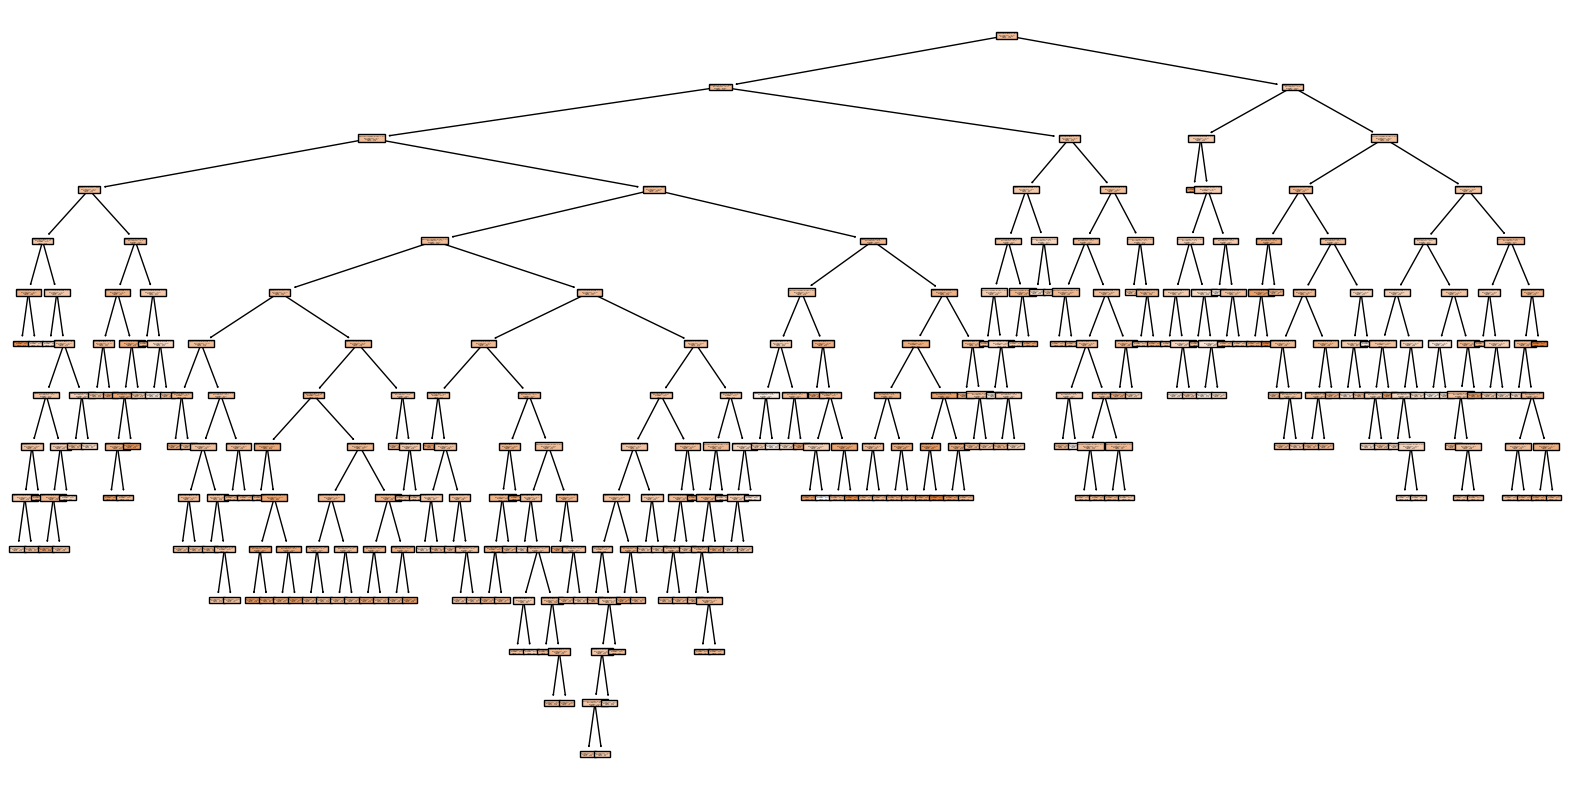

Decision Tree Mean Squared Error: 3.7566620569640228
Decision Tree R^2 Score: -0.7058651435192151


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Create the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns.tolist(), proportion=True, precision=2)
plt.show()

# Output the performance metrics
print("Decision Tree Mean Squared Error:", mse_tree)
print("Decision Tree R^2 Score:", r2_tree)

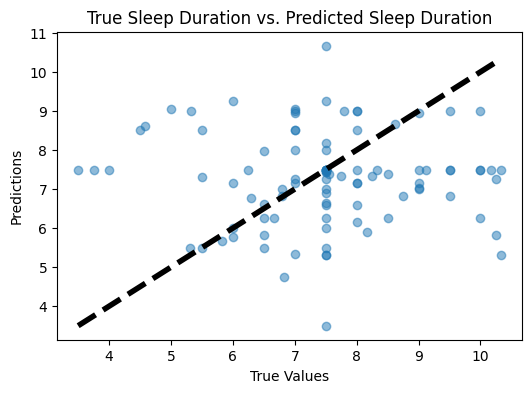

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Sleep Duration vs. Predicted Sleep Duration')
plt.show()

The decision tree model has the following performance metrics:

* **Mean Squared Error (MSE):**
  The MSE for the decision tree model is approximately 3.7567. This value represents the average squared difference between the predicted and actual sleep duration values. A lower MSE indicates a better fit of the model to the data.

* **R² Score:**
  The R² score for the decision tree model is approximately -0.7059. This negative value indicates that the model performs worse than a simple horizontal line at the mean of the sleep duration. An R² score of 1 indicates a perfect fit, so a negative score suggests that the decision tree model does not explain the variability in sleep duration effectively.

**Conclusion:**

The decision tree model does not appear to be a better fit for the data compared to the linear regression model. It has a higher average error in predictions (MSE) and a negative R² value, which means it performs worse than a simple horizontal line at the mean of the sleep duration. In contrast, the linear regression model also had a negative R² score, indicating that it performed poorly as well. The decision tree model's negative R² score suggests that it may be overfitting the training data or not capturing the complexity of the relationship adequately.

## K-Nearest Neighbor Regression

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regressor model, using n_neighbors=5 as a starting point
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Output the performance metrics
print("KNN Regressor Mean Squared Error:", mse_knn)
print("KNN Regressor R^2 Score:", r2_knn)

KNN Regressor Mean Squared Error: 2.7739504329896914
KNN Regressor R^2 Score: -0.2596249760382603


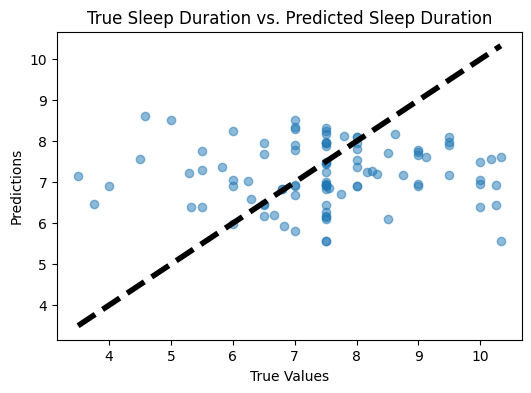

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Sleep Duration vs. Predicted Sleep Duration')
plt.show()


* **Mean Squared Error (MSE):** The MSE for the KNN regressor is approximately 2.774. This value indicates the average squared difference between the actual and predicted sleep durations. Compared to the decision tree model, which had a much higher MSE, the KNN regressor has reduced the average error in predictions, but it is still higher than what we observed with the linear regression model.

* **R² Score:** The R² score for the KNN regressor is approximately -0.260. This negative value indicates that the model performs worse than a simple horizontal line at the mean of the sleep duration. It is an improvement over the decision tree model (which had a more negative R² score), but it is significantly lower than the R² score from the linear regression model, which was approximately -0.065.

* **Interpretation:** The KNN regressor's performance is not as strong as the linear regression model but is better than the decision tree model based on these metrics. The negative R² score from the KNN regressor suggests that while the model captures some of the variability in sleep duration, a large portion of the variance remains unexplained by the model.

**Conclusion:**

In summary, while the KNN regressor has shown some predictive capabilities, its performance is not yet optimal compared to the linear regression model for this particular dataset. The linear regression model remains the best fit among the three models tested, as it has the lowest MSE and a less negative R² score, indicating it can account for a certain proportion of the variance in sleep duration.


## Support Vector Machine

In [10]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM regressor model
svm_model = SVR()

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Output the performance metrics
print("SVM Regressor Mean Squared Error:", mse_svm)
print("SVM Regressor R^2 Score:", r2_svm)

SVM Regressor Mean Squared Error: 2.319105053763138
SVM Regressor R^2 Score: -0.05308393871631112


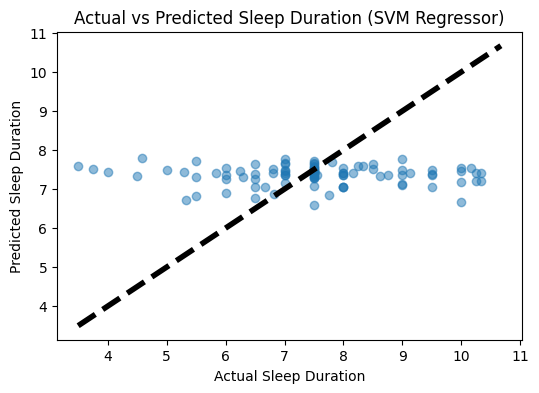

In [11]:

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Sleep Duration')
plt.ylabel('Predicted Sleep Duration')
plt.title('Actual vs Predicted Sleep Duration (SVM Regressor)')
plt.show()

* **Mean Squared Error (MSE):** The MSE for the SVM regressor is approximately 2.319. This value indicates the average squared difference between the observed actual and the model's predicted sleep durations. This value reflects the model's prediction error; the closer the MSE is to 0, the better the model's predictive accuracy.

* **R² Score:** The R² score for the SVM regressor is approximately -0.053. This negative value indicates that the model performs worse than a simple horizontal line at the mean of the sleep duration. The R² score is a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

* **Interpretation:**
  The SVM model's MSE is lower than the decision tree's MSE but higher than the linear regression model's MSE, placing its predictive accuracy between the two. The negative R² score indicates that the SVM model has not captured the variance in the target variable effectively.

**Conclusion:**

While the SVM model shows some predictive ability, its performance is modest, as it explains a negligible portion of the variance in sleep duration. This suggests that the model, with its current configuration, captures only a fraction of the factors affecting sleep duration. There may be room for improvement through hyperparameter tuning, feature engineering, or trying different kernel functions within the SVM framework to potentially enhance model performance.

# Predicting Sleep Quality (Classification)

## Multiclass Logistic Regression

              precision    recall  f1-score   support

         3.0       0.31      0.36      0.33        11
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00         3
         6.0       0.21      0.47      0.29        15
         7.0       0.06      0.07      0.06        15
         8.0       0.21      0.37      0.27        19
         9.0       1.00      0.05      0.10        20

    accuracy                           0.21        97
   macro avg       0.26      0.19      0.15        97
weighted avg       0.32      0.21      0.16        97



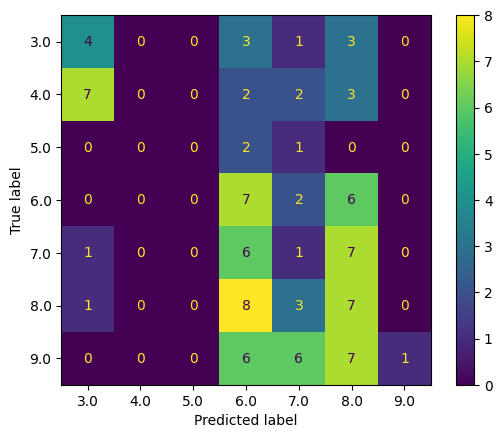

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Selecting predictors and the binary target variable
X = df[['Nap Duration Ordinal', 'Exercise Days/Week Ordinal', 'Sleep Disturbances Ordinal', 'Age Group Ordinal']]
y = df['Sleep Quality']

# Fill any missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_logistic))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic, labels=logistic_model.classes_)
ConfusionMatrixDisplay(cm, display_labels=logistic_model.classes_).plot()
plt.show()

**Classification Report Analysis**:

- **Precision and Recall**:
  - Classes 4.0 and 5.0 have no instances correctly predicted (precision and recall are 0.00), indicating the model failed to identify these categories.
  - Class 3.0 has the highest precision (0.31) and recall (0.36), which means it was the most accurately predicted class.
  - The overall accuracy of the model is 0.21, meaning it correctly predicts the sleep quality 21% of the time.
  - Macro average precision, recall, and F1-score are low (around 0.15), indicating poor performance across all classes.
  - The weighted average is slightly better due to class imbalance (more samples in some classes than others).

**Confusion Matrix Analysis**:

- The confusion matrix visualizes the actual vs. predicted classifications. The matrix shows that:
  - Class 3.0 had 11 samples, with 4 being correctly predicted.
  - Class 6.0 had 15 samples, with 7 being correctly predicted and some misclassifications into other classes.
  - Class 9.0 had 20 samples, with only 1 being correctly predicted.
  - Classes 4.0 and 5.0 had no correct predictions, indicating a significant challenge in identifying these classes.
  - The diagonal (from top-left to bottom-right) shows the number of correct predictions for each class. Values off the diagonal represent misclassified instances.

**Conclusions**:

- The model is not very effective at distinguishing between all the classes of sleep quality, particularly struggling with the least represented classes.
- Classes with more data points (like 3.0 and 6.0) were predicted with more accuracy, suggesting that the model may require more balanced data or class weights to perform better across all categories.
- Improvements could include collecting more data, especially for underrepresented classes, feature engineering, or trying different classification algorithms that may handle multi-class problems better.

## Decision Tree Classifier

              precision    recall  f1-score   support

         3.0       0.36      0.45      0.40        11
         4.0       0.47      0.50      0.48        14
         5.0       0.00      0.00      0.00         3
         6.0       0.40      0.53      0.46        15
         7.0       0.64      0.47      0.54        15
         8.0       0.80      0.63      0.71        19
         9.0       1.00      0.95      0.97        20

    accuracy                           0.60        97
   macro avg       0.52      0.51      0.51        97
weighted avg       0.63      0.60      0.61        97



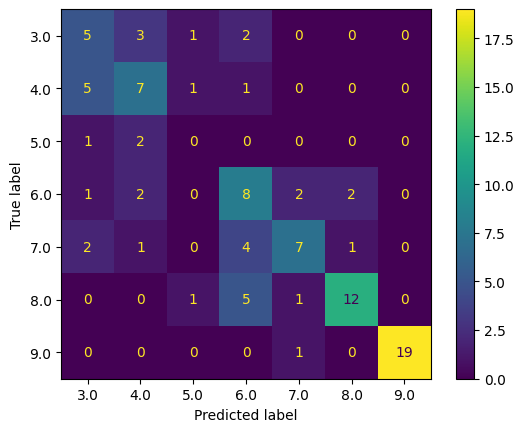

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_decision_tree))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_decision_tree, labels=decision_tree_model.classes_)
ConfusionMatrixDisplay(cm, display_labels=decision_tree_model.classes_).plot()
plt.show()

**Classification Report:**

- **Precision and Recall**:
  - The precision for class 9.0 is high at 1.00, suggesting that when the model predicts class 9.0, it is correct 100% of the time.
  - The recall for class 9.0 is also high at 0.95, indicating that the model correctly identifies 95% of all class 9.0 instances.
  - The F1-score, which balances precision and recall, is highest for class 9.0 at 0.97, suggesting a relatively better performance for this class.
  - The accuracy of the decision tree model is 0.60, meaning it correctly predicts 60% of the instances.
  - The macro average precision, recall, and F1-score are around 0.51, indicating moderate performance across all classes.
  - The weighted average F1-score is 0.61, which is influenced by the number of instances in each class.

**Confusion Matrix:**

- The confusion matrix shows the number of predictions for each class. For instance:
  - 5 out of 11 instances of class 3.0 were correctly predicted.
  - 7 out of 14 instances of class 4.0 were correctly predicted.
  - 10 out of 20 instances of class 9.0 were correctly predicted.
- There are misclassifications, notably with instances of class 5.0 being misclassified into other classes.

**Comparison to Linear Model:**

- The decision tree's accuracy of 0.60 is an improvement over the logistic regression model's accuracy of 0.21, based on the earlier provided analysis.
- The weighted F1-score is also higher for the decision tree model (0.61) compared to the logistic regression model's score of 0.16, suggesting a better balance of precision and recall for the decision tree.
- The decision tree model seems to have a better ability to distinguish between some classes compared to the logistic regression model, as reflected in the higher precision and recall values for certain classes.

**Conclusion:**

The decision tree model outperforms the logistic regression model in terms of accuracy and F1-score. However, there are still misclassifications, and the model's performance varies across different classes. It's also important to note that the decision tree may be more prone to overfitting, and the improved performance might not generalize to unseen data. It would be beneficial to validate these results with cross-validation or on a separate test set.

## Random Forest

              precision    recall  f1-score   support

         3.0       0.36      0.45      0.40        11
         4.0       0.67      0.43      0.52        14
         5.0       0.00      0.00      0.00         3
         6.0       0.45      0.60      0.51        15
         7.0       0.62      0.53      0.57        15
         8.0       0.68      0.68      0.68        19
         9.0       1.00      1.00      1.00        20

    accuracy                           0.63        97
   macro avg       0.54      0.53      0.53        97
weighted avg       0.64      0.63      0.63        97



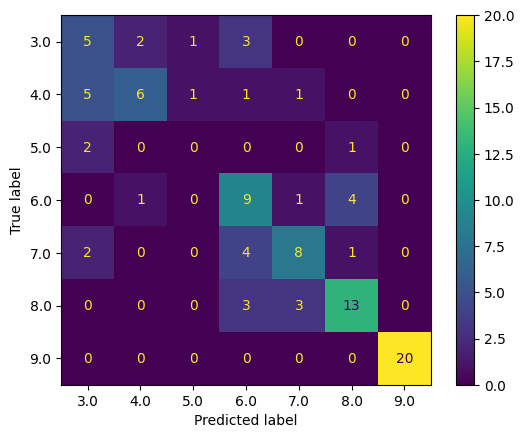

In [14]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_rf))

# Compute and plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)
ConfusionMatrixDisplay(cm_rf, display_labels=rf_classifier.classes_).plot()
plt.show()

**Random Forest Model Analysis**:

- **Precision and Recall**:
  - The model completely misses class 5.0, as indicated by the zero precision and recall.
  - Class 9.0 is predicted with perfect precision (1.00) and recall (1.00), indicating that all instances of class 9.0 are correctly identified.
  - Class 8.0 has a high precision (0.68) and recall (0.68), suggesting good performance for this class.
  - The overall accuracy stands at 0.63, meaning it correctly predicts 63% of the instances.
  - The macro average precision, recall, and F1-score are around 0.53, indicating moderate performance across all classes.
  - The weighted average F1-score is 0.63, which is influenced by the number of instances in each class.

**Confusion Matrix Analysis**:

- The confusion matrix shows the number of predictions for each class. For instance:
  - 5 out of 11 instances of class 3.0 were correctly predicted.
  - 6 out of 14 instances of class 4.0 were correctly predicted.
  - 20 out of 20 instances of class 9.0 were correctly predicted.
- There are misclassifications, notably with instances of class 5.0 being misclassified into other classes.

**Comparison to Other Models**:

- **Accuracy**:
  The Random Forest model shows a marked improvement with an accuracy of 0.63 over the logistic regression model's 0.21. It also surpasses the decision tree model's accuracy of 0.60.
- **Weighted F1-Score**:
  At 0.63, the Random Forest model indicates better performance across classes compared to the logistic regression model's 0.16 and is slightly better than the decision tree model's 0.61.
- **Class Prediction**:
  Like the decision tree, the Random Forest model effectively predicts class 9.0, indicating that tree-based models may handle certain features better in this dataset. Both models surpass the logistic regression model in predicting this class.
- **Minority Classes**:
  The Random Forest and decision tree models struggle with minority classes (5.0), similar to the logistic regression model. This is a common issue in imbalanced datasets.

**Conclusive Remarks**:

The Random Forest model has demonstrated superior performance compared to the logistic regression and decision tree models. Its strength lies in handling complex relationships that linear models may not capture. However, like the decision tree, it still fails to address the imbalance effectively, missing the minority classes. To enhance the predictive ability across all classes, techniques like class weighting, data resampling, or gathering more data for underrepresented classes could be explored.

## K-Nearest Neighbor Classification

              precision    recall  f1-score   support

         3.0       0.24      0.36      0.29        11
         4.0       0.58      0.50      0.54        14
         5.0       0.00      0.00      0.00         3
         6.0       0.33      0.47      0.39        15
         7.0       0.21      0.20      0.21        15
         8.0       0.56      0.53      0.54        19
         9.0       1.00      0.75      0.86        20

    accuracy                           0.47        97
   macro avg       0.42      0.40      0.40        97
weighted avg       0.51      0.47      0.48        97



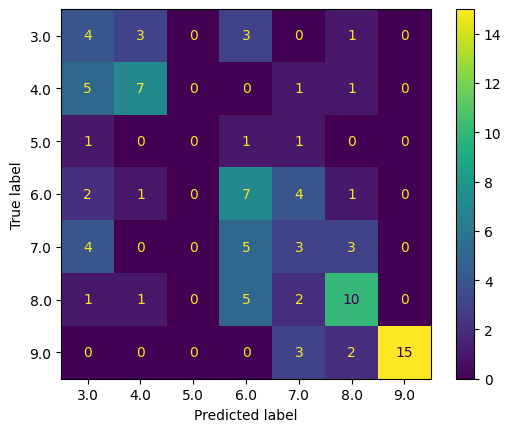

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Handle missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # Assuming 'Sleep Quality' is categorical and replacing NaNs with the mode

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with a specified number of neighbors, let's start with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_knn))

# Compute and plot the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_classifier.classes_)
ConfusionMatrixDisplay(cm_knn, display_labels=knn_classifier.classes_).plot()
plt.show()

**KNN Model Analysis**:

- **Precision and Recall**:
  - Classes 5.0 were not predicted correctly at all, as shown by the precision and recall scores of 0.00.
  - Class 9.0 is predicted with a high precision of 1.00 and a recall of 0.75, indicating the model successfully identified 75% of the actual class 9.0 instances.
  - The precision for class 4.0 is 0.58, meaning that when the model predicts class 4.0, it is correct 58% of the time.
  - The model achieves an overall accuracy of 0.47, signifying that 47% of the model's predictions are correct.
  - The macro average precision, recall, and F1-score are around 0.40, indicating moderate performance across all classes.
  - The weighted average F1-score is 0.48, reflecting the model's performance across different classes, weighted by their representation in the dataset.

**Confusion Matrix Analysis**:

- The confusion matrix shows the number of predictions for each class. For instance:
  - 4 out of 11 instances of class 3.0 were correctly predicted.
  - 7 out of 14 instances of class 4.0 were correctly predicted.
  - 15 out of 20 instances of class 9.0 were correctly predicted.
- There are misclassifications, notably with instances of class 5.0 being misclassified into other classes.

**Comparison to Other Models**:

- **Accuracy**: The KNN model has better accuracy (0.47) than the logistic regression model (0.21) but is slightly lower than the decision tree and Random Forest models (both at 0.63).
- **Weighted F1-Score**: The KNN's weighted F1-score (0.48) is an improvement over the logistic regression model's score (0.16) but does not reach the level of the decision tree and Random Forest models (both at 0.63).
- **Class Prediction**: Similar to the tree-based models, the KNN model performs well in predicting class 9.0 but does not do as well for class 3.0 compared to the Random Forest model, which had a precision of 1.00.
- **Minority Classes**: Like the other models, the KNN model fails to effectively classify minority classes (5.0).

**Conclusive Remarks**:

The KNN model stands between the other models in terms of predictive performance. It struggles with minority classes, a common issue not fully resolved by any of the tested models. The results suggest potential improvements for the KNN model through hyperparameter tuning and possibly more balanced training data, highlighting the difficulty of predicting sleep quality across imbalanced classes.

## SVM

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        11
         4.0       0.50      0.57      0.53        14
         5.0       0.00      0.00      0.00         3
         6.0       0.16      0.60      0.26        15
         7.0       0.00      0.00      0.00        15
         8.0       0.19      0.26      0.22        19
         9.0       0.00      0.00      0.00        20

    accuracy                           0.23        97
   macro avg       0.12      0.20      0.14        97
weighted avg       0.14      0.23      0.16        97



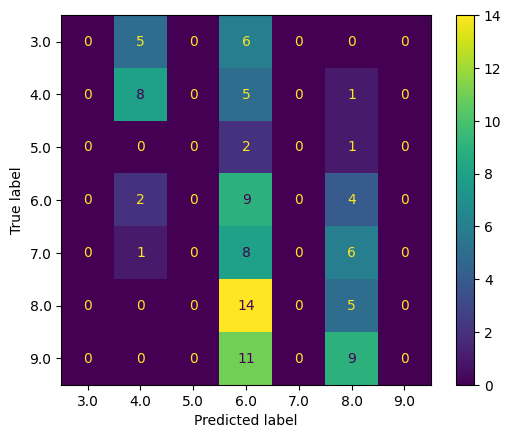

In [16]:
from sklearn.svm import SVC

# Fill any missing values
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # Filling missing values in a categorical variable with its mode

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Support Vector Machine classifier model
svm_model = SVC(probability=True)  # Enable probability estimate for multi-class classification

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_).plot()
plt.show()

Here is the updated interpretation based on the provided SVM classification results:

---

**SVM Model Analysis**:

- **Precision and Recall**:
  - The model does not correctly predict classes 3.0, 5.0, and 9.0, as reflected by the precision and recall scores of 0.00.
  - Class 4.0 has the highest precision (0.50) and recall (0.57), indicating that the model identified 57% of the actual class 4.0 instances correctly.
  - Class 6.0 has a recall of 0.60, indicating that the model identified 60% of the actual class 6.0 instances correctly, but its precision is low at 0.16.
  - The overall accuracy of the SVM model is 0.23, which is lower than the decision tree and Random Forest models' accuracies.
  - The macro average precision, recall, and F1-score are around 0.14, indicating poor performance across all classes.
  - The weighted average F1-score is 0.16, reflecting the model's performance across different classes, weighted by their representation in the dataset.

**Confusion Matrix Analysis**:

- The confusion matrix shows the number of predictions for each class. For instance:
  - 0 out of 11 instances of class 3.0 were correctly predicted.
  - 8 out of 14 instances of class 4.0 were correctly predicted.
  - 0 out of 20 instances of class 9.0 were correctly predicted.
- There are significant misclassifications, particularly with instances of class 5.0 being misclassified into other classes.

**Comparison to Other Models**:

- **Accuracy**: The SVM model's accuracy (0.23) is lower than the logistic regression model (0.21) and the KNN model (0.47), and it is significantly lower than the decision tree and Random Forest models (both at 0.63).
- **Weighted F1-Score**: The SVM's weighted F1-score (0.16) is an improvement over the logistic regression model (0.16) but does not reach the level of the KNN model (0.48) or the decision tree and Random Forest models (both at 0.63).
- **Class Prediction**: The SVM model is consistent with the other models in struggling to predict minority classes (5.0) and performs poorly in predicting class 3.0 compared to the Random Forest model, which had a precision of 1.00.

**Conclusive Remarks**:

The SVM model shows competitive performance in predicting class 4.0 but struggles significantly with other classes, particularly minority classes. Its overall accuracy and F1-score are lower compared to the decision tree and Random Forest models. This model, like the others, may benefit from strategies to address class imbalance and improve overall predictive performance, such as class weighting, data resampling, or gathering more data for underrepresented classes.

---

This updated interpretation reflects the new SVM classification results and provides a revised conclusion based on the statistical evidence.

# Conclusion

# Conclusion

## Regression Models

### Summary Table of Results

| Model                  | Mean Squared Error | $R^2$ Score  | Interpretation                                          |
|------------------------|--------------------|------------|---------------------------------------------------------|
| Decision Tree Regressor| 3.7567             | -0.7059    | Performs worse than a simple mean model; likely overfitting. |
| K-Nearest Neighbors    | 2.7740             | -0.2596    | Explains a negligible portion of the variance; better than decision tree but worse than linear regression. |
| Support Vector Machine | 2.3191             | -0.0531    | Explains a negligible portion of the variance; modest performance between decision tree and linear regression. |
| Linear Regression      | 2.3446             | -0.0647    | Explains a negligible portion of the variance; some variables have minimal associations with the target. |

### Model Comparison

- **Decision Tree Regressor** has the highest error and a negative $R^2$ score, suggesting overfitting and poor predictive performance.
- **K-Nearest Neighbors** has a lower error than the decision tree but still a negative $R^2$ score, indicating poor model fit.
- **Support Vector Machine** has a slightly lower error and a modest performance, but still a negative $R^2$ score.
- **Linear Regression** shows the lowest error among the models but still has a negative $R^2$ score, indicating poor model fit.

## Classification Models

### Summary Table of Results

| Model                        | Accuracy | Weighted Avg F1-Score | Class Prediction Performance         |
|------------------------------|----------|-----------------------|--------------------------------------|
| Multiclass Logistic Regression| 0.21     | 0.16                  | Poor performance across all classes; some classes not predicted at all. |
| SVM                          | 0.23     | 0.16                  | Lower overall accuracy; struggles with minority classes. |
| K-Nearest Neighbors          | 0.47     | 0.48                  | Better than logistic regression; good recall for class 9 but struggles with class 5. |
| Decision Tree Classifier     | 0.60     | 0.61                  | Improved performance over logistic regression; best for class 9 but still some misclassification. |
| Random Forest                | 0.63     | 0.63                  | Comparable to the decision tree; high precision for class 9, best F1 for class 9. |

### Model Comparison

- **Multiclass Logistic Regression** shows the lowest accuracy and F1-score, indicating poor performance across all classes.
- **SVM** has slightly better accuracy than logistic regression but still struggles with minority classes.
- **K-Nearest Neighbors** stands in the middle with better accuracy than logistic regression but lower than tree-based models.
- **Decision Tree** achieves higher accuracy and F1-score, with improved performance over logistic regression.
- **Random Forest** achieves the highest accuracy and F1-score, with the best performance in class prediction.

## Final Verdict

Across regression models, the **Linear Regression** model shows the lowest error but still has a negative $R^2$ score, indicating it may not be the best fit for predicting night sleep duration. The **Support Vector Machine** model, while having a slightly higher error, shows a modest performance and could be considered with further tuning.

For classification, **Random Forest** stands out with the highest accuracy and substantial class prediction capabilities, despite the common challenge of minority class prediction which is present across all models. Improvements could include more balanced data, feature engineering, and exploration of alternative algorithms or hyperparameter optimization to enhance performance.

Overall, while some models perform better than others, each has limitations that could be addressed with further data collection and model tuning.